# Initializing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Deep_Learning/auto-mpg.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [4]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [5]:
dataset.replace('?', np.NaN, inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
dataset.drop(['car name'], axis=1, inplace=True)

In [9]:
dataset['horsepower'] = dataset['horsepower'].astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee8efa6ef0>,
      dtype=object)

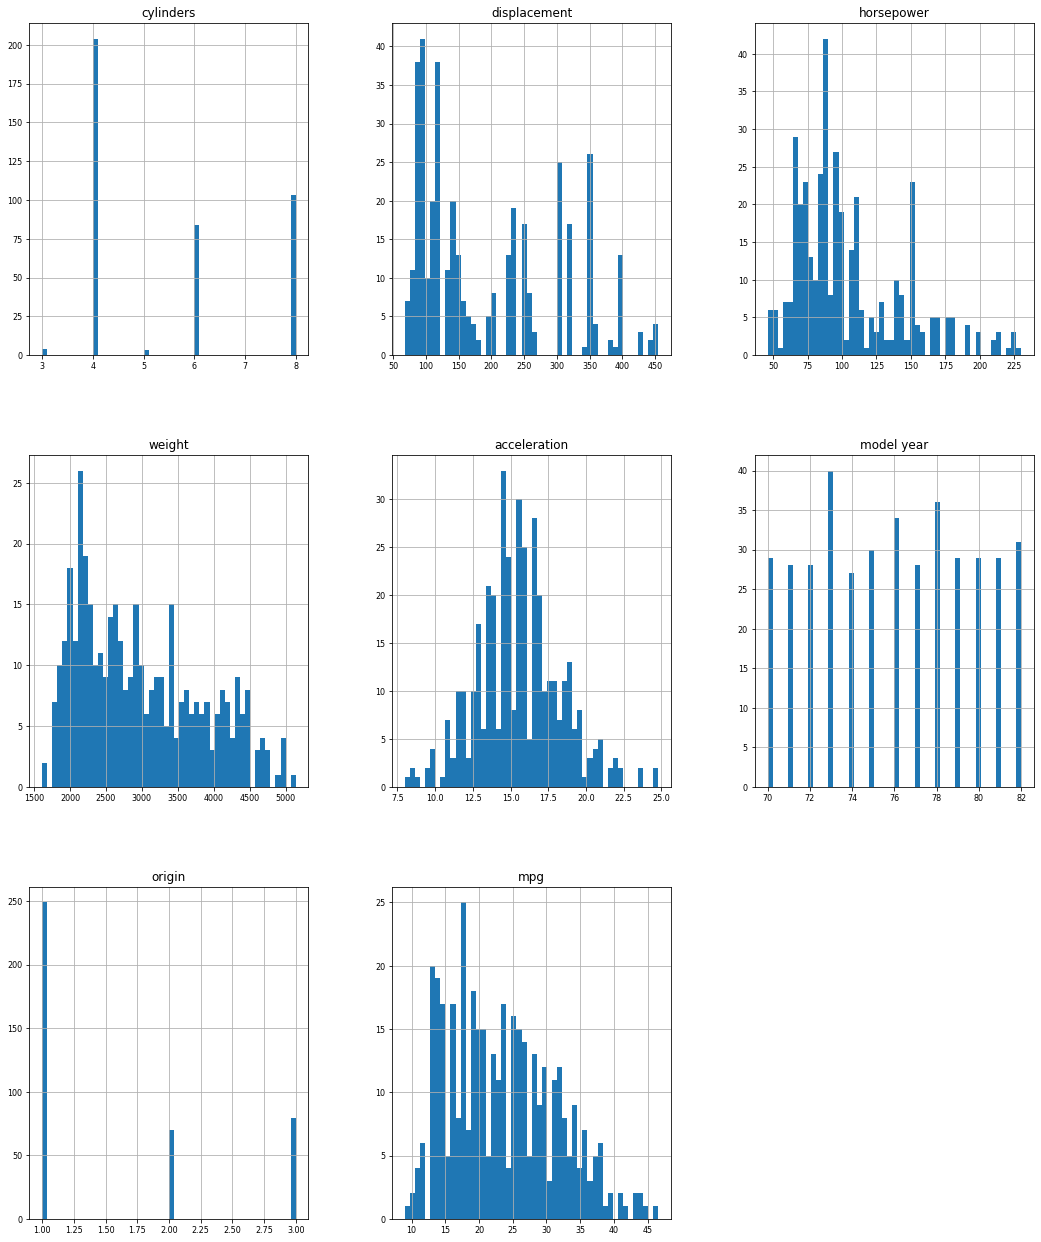

In [10]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
med_hp = dataset['horsepower'].median(axis=0)
dataset['horsepower'].replace(np.nan, med_hp, inplace=True)

In [12]:
dataset.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
dtype: int64

In [14]:
origin = dataset.pop('origin')

In [16]:
#one hot encoding untuk kolom origin
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg,USA,Europe,Japan
393,4,140.0,86.0,2790,15.6,82,27.0,1.0,0.0,0.0
394,4,97.0,52.0,2130,24.6,82,44.0,0.0,1.0,0.0
395,4,135.0,84.0,2295,11.6,82,32.0,1.0,0.0,0.0
396,4,120.0,79.0,2625,18.6,82,28.0,1.0,0.0,0.0
397,4,119.0,82.0,2720,19.4,82,31.0,1.0,0.0,0.0


In [17]:
corr = dataset.corr()

corr

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg,USA,Europe,Japan
cylinders,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396,0.604351,-0.352861,-0.396479
displacement,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203,0.651407,-0.373886,-0.433505
horsepower,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453,0.485418,-0.282877,-0.318972
weight,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741,0.598398,-0.298843,-0.440817
acceleration,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289,-0.250806,0.204473,0.109144
model year,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267,-0.139883,-0.024489,0.193101
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000,-0.568192,0.259022,0.442174
USA,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,-0.568192,1.000000,-0.597198,-0.643317
Europe,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,0.259022,-0.597198,1.000000,-0.229895
Japan,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,0.442174,-0.643317,-0.229895,1.000000


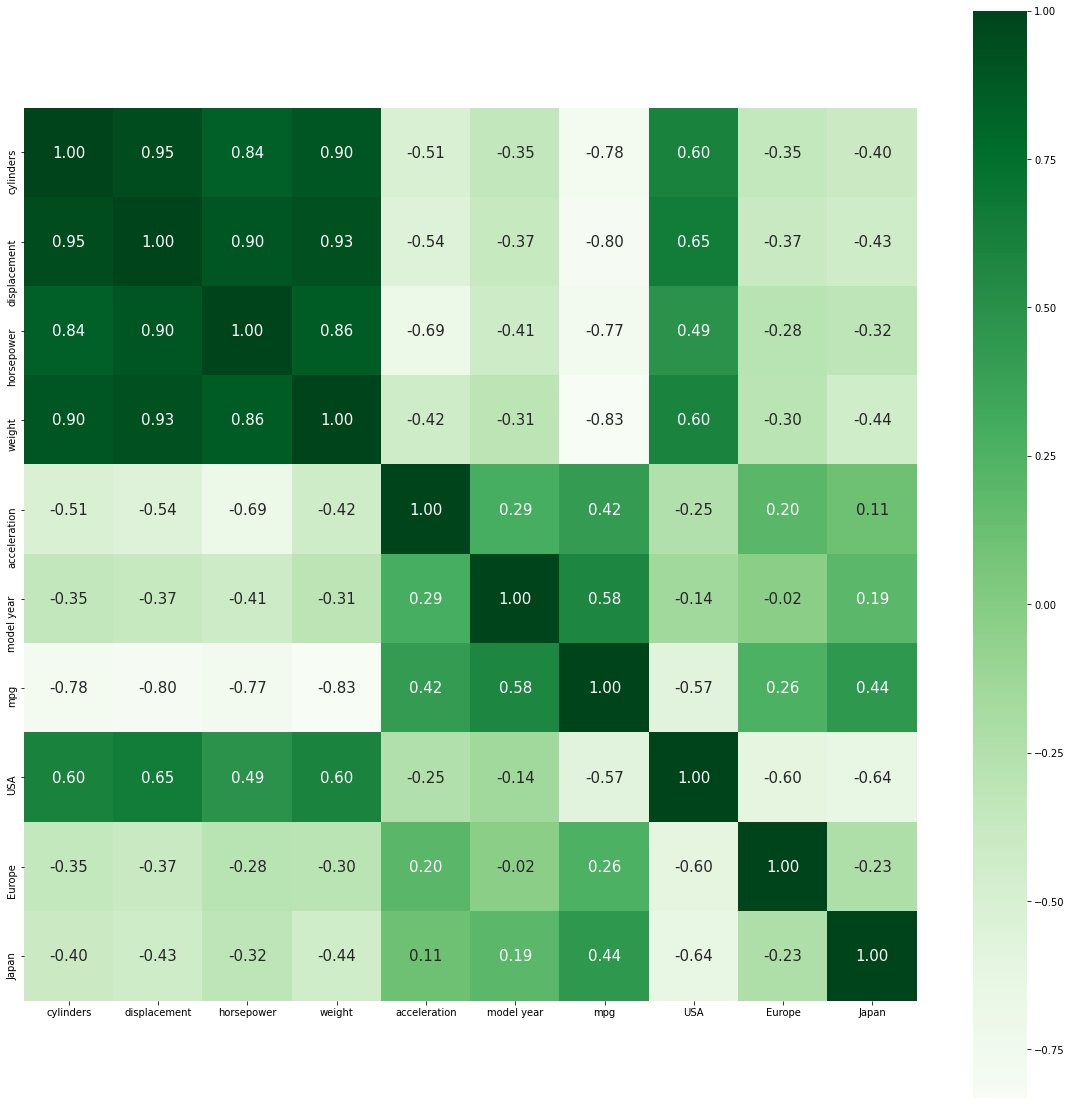

In [18]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Linear Regression

## Feature Engineering

In [36]:
feature = dataset.drop(['mpg'], axis=1)
label = dataset['mpg']

In [37]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

feature = scaler.fit_transform(feature.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [38]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.13828143624100417
MAE (Mean Absolute Error) 0.29068545642292964
r^2 score 0.8629631616932176
RMSE (Root Mean Squared Error 0.3718621199329184


# Deep Learning MLP

In [42]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=9, kernel_initializer='normal', activation='relu')) # 8 neuron, sesuai dengan 8 feature
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
history_mlp = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9065 - val_loss: 0.8018
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6400 - val_loss: 0.4725
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3304 - val_loss: 0.2556
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2028 - val_loss: 0.2129
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1782 - val_loss: 0.1977
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1634 - val_loss: 0.1848
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1530 - val_loss: 0.1756
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1434 - val_loss: 0.1668
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1363 - val_loss: 0.1596
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1298 - val_loss: 0.1549
Epoch 11/50
40/40 [

In [44]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [45]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1306903969628914
MAE (Mean Absolute Error) 0.28525126673871026
r^2 score 0.8704858780491728
RMSE (Root Mean Squared Error 0.36151126809947626


# Deeper Model

In [46]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=9, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.9924 - val_loss: 0.9923
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.9092 - val_loss: 0.7964
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5761 - val_loss: 0.3598
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2348 - val_loss: 0.2151
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1789 - val_loss: 0.1999
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1637 - val_loss: 0.1886
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1522 - val_loss: 0.1769
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1430 - val_loss: 0.1700
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1364 - val_loss: 0.1613
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1301 - val_loss: 0.1580
Epoch 11/50
40/40 [

In [47]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [48]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.13524085295962185
MAE (Mean Absolute Error) 0.2894759423988476
r^2 score 0.8659763782956464
RMSE (Root Mean Squared Error 0.36775107472259255


# Wider Model

In [49]:
from tensorflow.keras.optimizers import Adam
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

opt = Adam(lr=0.001)
wider_model.compile(loss='mean_squared_error', optimizer=opt)

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8435 - val_loss: 0.6971
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5048 - val_loss: 0.3333
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2375 - val_loss: 0.2113
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1748 - val_loss: 0.1972
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1571 - val_loss: 0.1796
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1440 - val_loss: 0.1682
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1344 - val_loss: 0.1592
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1260 - val_loss: 0.1539
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1217 - val_loss: 0.1475
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1169 - val_loss: 0.1455
Epoch 11/

In [50]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [51]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.13281134304101708
MAE (Mean Absolute Error) 0.2805707389230333
r^2 score 0.8683840214828369
RMSE (Root Mean Squared Error 0.36443290608974527


In [52]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [53]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
97,0.079804,0.129528,97
98,0.079520,0.129823,98
80,0.080185,0.129858,80
34,0.089448,0.130012,34
56,0.084058,0.130105,56
...,...,...,...
4,0.157063,0.179630,4
3,0.174773,0.197212,3
2,0.237546,0.211338,2
1,0.504784,0.333335,1


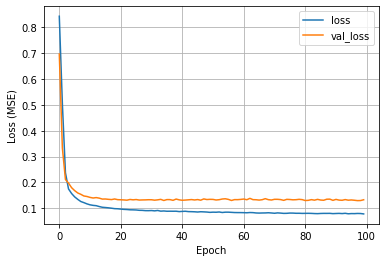

In [54]:
plot_loss(history) # epoch vs loss graph

In [55]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                200       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [56]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9513 - val_loss: 0.8997
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7835 - val_loss: 0.6516
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss: 0.2863
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2120 - val_loss: 0.2032
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1668 - val_loss: 0.1865
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1508 - val_loss: 0.1719
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1382 - val_loss: 0.1626
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1306 - val_loss: 0.1545
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1249 - val_loss: 0.1520
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1203 - val_loss: 0.1473
Epoch 11/

In [57]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [58]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.12626001822209734
MAE (Mean Absolute Error) 0.28224625305876805
r^2 score 0.8748763812985162
RMSE (Root Mean Squared Error 0.35533085740208004


In [59]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
97,0.081413,0.125636,97
83,0.084530,0.125678,83
71,0.085855,0.125716,71
80,0.084110,0.125723,80
74,0.084623,0.125973,74
...,...,...,...
4,0.166808,0.186477,4
3,0.211986,0.203165,3
2,0.447385,0.286275,2
1,0.783536,0.651569,1


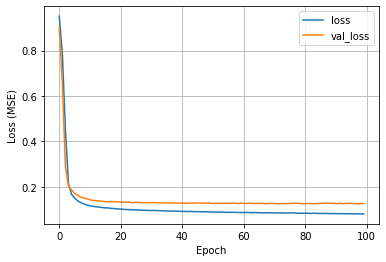

In [60]:
plot_loss(history_tuned) # epoch vs loss graph

In [61]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                200       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [62]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8792 - val_loss: 0.7394
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5606 - val_loss: 0.3932
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2784 - val_loss: 0.2211
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1792 - val_loss: 0.1923
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1572 - val_loss: 0.1817
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1699
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1382 - val_loss: 0.1618
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1305 - val_loss: 0.1625
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1262 - val_loss: 0.1552
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1212 - val_loss: 0.1552
Epoch 11/

In [63]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [64]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1317265945003693
MAE (Mean Absolute Error) 0.2803103601933823
r^2 score 0.8694590067766632
RMSE (Root Mean Squared Error 0.3629415855208236


In [65]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
98,0.075571,0.128801,98
89,0.076982,0.130253,89
84,0.078257,0.130385,84
97,0.076121,0.130772,97
27,0.092685,0.130781,27
...,...,...,...
4,0.157240,0.181672,4
3,0.179170,0.192312,3
2,0.278365,0.221067,2
1,0.560648,0.393217,1


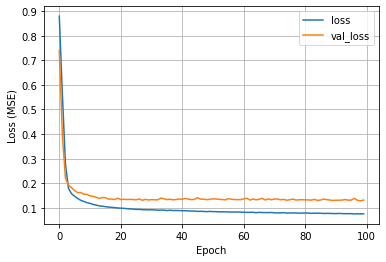

In [66]:
plot_loss(history_rmsprop)

# Kesimpulan
Hasil terbaik diperoleh pada wider model dengan optimizer SGD. Hasil akurasi yang diperoleh sebesar 0.8749 dengan nilai MSE sebesar 0.1262. Hasil dari deep learning untuk dataset ini tidak begitu signifikan untuk peningkatan performa model yang sebelumnya menggunakan model regresi linear, dimana akurasinya sebesar 0.8629 dengan nilai MSE 0.1382.